In [50]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [51]:
# reading the data
df=pd.read_csv("Task_1.csv")
df=df.dropna()
df.head()

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [52]:
df.labels.unique() 

array(['ham', 'spam'], dtype=object)

<Axes: xlabel='labels', ylabel='count'>

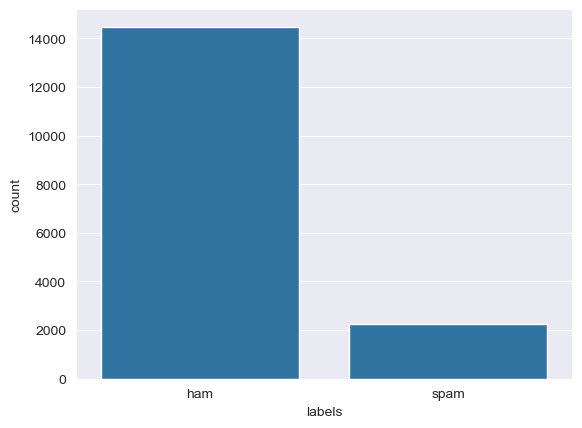

In [53]:
sns.set_style('darkgrid')
sns.countplot(x='labels',data=df)

In [54]:
# preprocessing the data
def preprocessing(text):
    text= text.lower().strip() 
    text=re.sub('[^a-zA-Z]',' ',text)
    text=re.sub(' +', ' ', text)
    return text

In [55]:
df['text']=df['text'].apply(preprocessing)

In [56]:
df.head()

,labels,text
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final ...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives arou...


In [57]:
df['labels'] = df['labels'].map({'ham': 1, 'spam': 0})

In [58]:
X = df['text']
Y = df['labels']

<Axes: xlabel='labels', ylabel='count'>

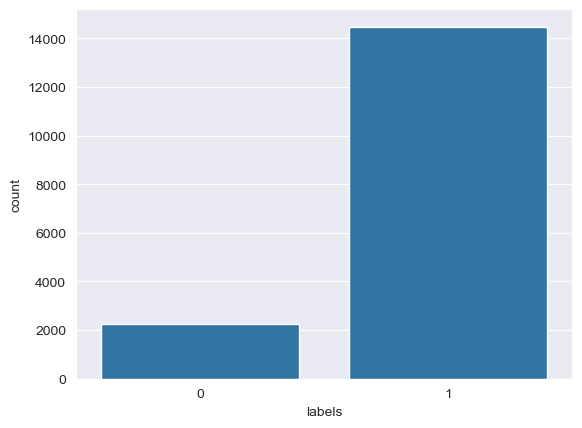

In [59]:
sns.set_style('darkgrid')
sns.countplot(x='labels',data=df)

In [60]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=30)

In [61]:
vectorizer = TfidfVectorizer(min_df=1)
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

In [62]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_features, Y_train)

LogisticRegression(max_iter=1000)

In [63]:
# Accuracy on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

# Accuracy on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print("Accuracy on training data:", accuracy_on_training_data)
print("Accuracy on test data:", accuracy_on_test_data)


Accuracy on training data: 0.9815285671552497
Accuracy on test data: 0.9709928229665071


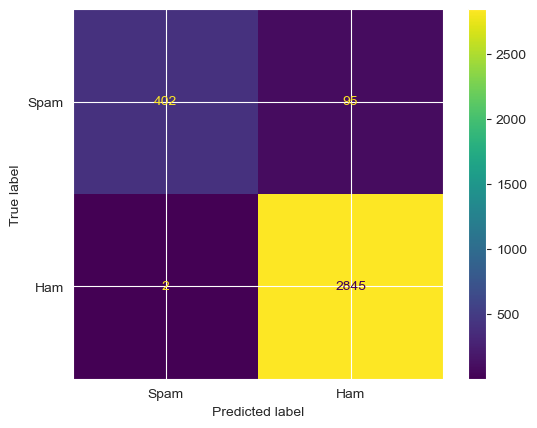

In [84]:
# Confusion matrix
cm = confusion_matrix(Y_test, prediction_on_test_data, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Spam', 'Ham'])
disp.plot()
plt.show()

In [65]:
input_your_mail=['Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&Cs apply']
input_data_features = vectorizer.transform(input_your_mail)
# Predicting the given input
prediction = model.predict(input_data_features)
print("Prediction for the input mail:", "Spam" if prediction[0] == 0 else "Ham")

Prediction for the input mail: Spam
